In [23]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import os

#### 1. Загрузите данные ex6data1.mat из файла.

In [24]:
data2 = scio.loadmat('data/Lab 6/ex6data1.mat')
X = data2['X']

#### 2. Реализуйте функцию случайной инициализации K центров кластеров.

In [25]:
def kMeansInitCentroids(X, K):
    randix = np.random.permutation(np.size(X, 0))
    centroids = X[randix[:K], :]
    return centroids

#### 3. Реализуйте функцию определения принадлежности к кластерам.

In [26]:
def findClosestCentroids(X, center):
    K = np.size(center, 0)
    m = np.size(X, 0)
    idx = np.zeros((m, 1), dtype=int)
    K_temp = np.zeros((K,), dtype=float)
    for i in range(m):
        for j in range(K):
            K_temp[j] = np.sum(np.square(X[i, :] - center[j, :]))
        idx[i] = np.argmin(K_temp)
    return idx

#### 4. Реализуйте функцию пересчета центров кластеров.

In [27]:
def computeCentroids(X, idx, K):
    m, n = np.shape(X)
    centroids = np.zeros((K, n), dtype=float)
    
    for i in range(K):
        centroids[i, :] = (X.T @ (idx == i) / np.sum(idx == i)).reshape(-1)
    
    return centroids

#### 5. Реализуйте алгоритм K-средних.

In [28]:
def drawLine(p1, p2):
    x = np.array([p1[0], p2[0]])
    y = np.array([p1[1], p2[1]])
    plt.plot(x, y)
    

In [29]:
def plotDataPoints(X, idx, K):
    colors = ['red', 'green', 'blue']
    plt.scatter(X[:, 0], X[:, 1], c=idx,
                cmap=pltcolor.ListedColormap(colors), s=40)
    

In [30]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    plotDataPoints(X, idx, K)
    plt.plot(centroids[:, 0], centroids[:, 1], 'x',
             MarkerEdgeColor='k', ms=10,
             LineWidth=3)
    for j in range(np.size(centroids, 0)):
        drawLine(centroids[j, :], previous[j, :])
    plt.title('Iteration number %d' % (i + 1))
    

In [31]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    m, n = np.shape(X)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1), dtype=float)

    if plot_progress:
        plt.ion()
        fig = plt.figure()

    for i in range(max_iters):
        print('K-Means iteration %d/%d...\n' % (i + 1, max_iters))
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            fig.canvas.draw()
            os.system('pause')
        centroids = computeCentroids(X, idx, K)
    plt.show(block=True)
    plt.ioff()
    return centroids, idx

K-Means iteration 1/10...



ValueError: 'c' argument has 50 elements, which is not acceptable for use with 'x' with size 50, 'y' with size 50.

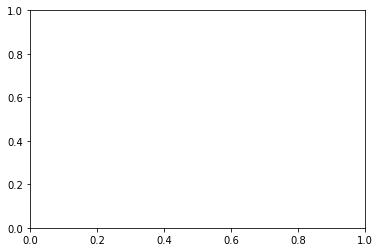

In [32]:
max_iters = 10
initial_centroids = np.array([3, 3, 6, 2, 8, 5]).reshape(3, 2)
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('K-Means Done.\n')
